In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import Dense, LSTM, GRU
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load and preprocess the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df=pd.read_csv(url, usecols=[1])
df

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [3]:
df[df['Passengers']>500]

,Passengers
115,505
126,548
127,559
137,535
138,622
139,606
140,508


In [4]:
df.values.shape

(144, 1)

In [5]:
data=df.values.astype('float32')

In [6]:
type(data)

numpy.ndarray

In [7]:
#normalize the data
minmax = MinMaxScaler()
data = minmax.fit_transform(data)
data.shape

(144, 1)

In [8]:
#create a sequence of data
def create_dataset(data, look_back):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[(i + look_back), 0])
    return np.array(X), np.array(Y)
look_back = 3
X,Y= create_dataset(data, look_back)
X.shape, Y.shape


((141, 3), (141,))

In [9]:
#reshape the data to be 3D [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
X.shape, Y.shape

((141, 3, 1), (141,))

In [10]:

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# LSTM model

In [11]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(look_back, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train, Y_train, epochs=100, batch_size=16, validation_data=(X_test, Y_test), verbose=1)

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.0885 - val_loss: 0.2493
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0414 - val_loss: 0.1215
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0149 - val_loss: 0.0460
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0124 - val_loss: 0.0267
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0130 - val_loss: 0.0316
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0105 - val_loss: 0.0424
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0093 - val_loss: 0.0413
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0087 - val_loss: 0.0323
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0076 - val_loss: 0.0275
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0076 - val_loss: 0.0259
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0067 - val_loss: 0.0263
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0062 - val_lo

# GRU model


In [12]:
# Build the GRU model
gru_model = Sequential()
gru_model.add(GRU(100, input_shape=(look_back, 1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the GRU model
gru_model.fit(X_train, Y_train, epochs=100, batch_size=16, validation_data=(X_test, Y_test), verbose=1)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0997 - val_loss: 0.1885
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0228 - val_loss: 0.0426
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0206 - val_loss: 0.0298
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0160 - val_loss: 0.0453
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0111 - val_loss: 0.0505
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0103 - val_loss: 0.0386
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0095 - val_loss: 0.0258
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0072 - val_loss: 0.0242
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0074 - val_loss: 0.0240
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0056 - val_loss: 0.0240
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0063 - val_loss: 0.0241
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0064 - val_lo

# Evaluate the model

In [13]:
# Make predictions
def evaluate_model(model, X_test, Y_test,label):
    predictions = model.predict(X_test)
    predictions = minmax.inverse_transform(predictions)
    Y_test = minmax.inverse_transform(Y_test.reshape(-1, 1))
    rmse = np.sqrt(mean_squared_error(Y_test, predictions))
    mae = mean_absolute_error(Y_test, predictions)
    print(f'{label} -  RMSE: {rmse:.2f}')
    print(f'{label} - MAE: {mae:.2f}')
    return predictions
    
lstm_predictions=evaluate_model(lstm_model,  X_test, Y_test, 'LSTM')
gru_predictions=evaluate_model(gru_model,  X_test, Y_test, 'GRU')


    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
LSTM -  RMSE: 55.98
LSTM - MAE: 48.97
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
GRU -  RMSE: 53.61
GRU - MAE: 43.83


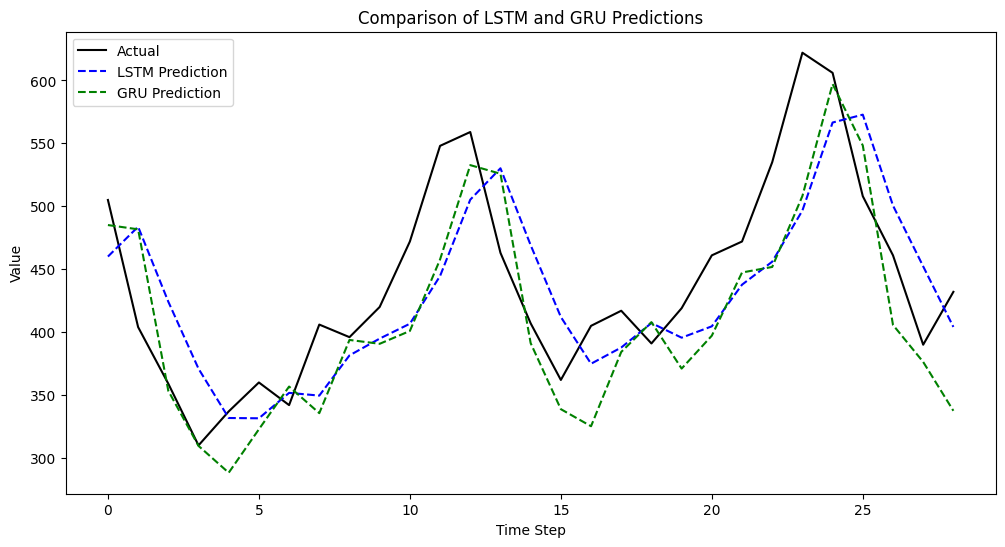

In [14]:
# Inverse transform the true values for plotting
true_values = minmax.inverse_transform(Y_test.reshape(-1, 1))
# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(true_values, label='Actual', color='black')
plt.plot(lstm_predictions, label='LSTM Prediction', color='blue', linestyle='--')
plt.plot(gru_predictions, label='GRU Prediction', color='green', linestyle='--')
plt.title('Comparison of LSTM and GRU Predictions')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()